# Name:-Mahendra Singam


# The Sparks Foundation

# Technical Task 4:-Timeline Analysis : Covid-19 

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline
sns.set()

# Loading Dataset

In [2]:
data = pd.read_csv("covid-data.csv")

In [3]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [4]:
data.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
95061,ZWE,Africa,Zimbabwe,2021-06-07,39238.0,49.0,39.571,1611.0,5.0,2.429,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
95062,ZWE,Africa,Zimbabwe,2021-06-08,39321.0,83.0,46.143,1617.0,6.0,2.571,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
95063,ZWE,Africa,Zimbabwe,2021-06-09,39432.0,111.0,57.286,1622.0,5.0,3.286,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
95064,ZWE,Africa,Zimbabwe,2021-06-10,39496.0,64.0,57.714,1626.0,4.0,3.143,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
95065,ZWE,Africa,Zimbabwe,2021-06-11,39688.0,192.0,77.714,1629.0,3.0,3.429,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN


In [5]:
#Summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95066 entries, 0 to 95065
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               95066 non-null  object 
 1   continent                              90577 non-null  object 
 2   location                               95066 non-null  object 
 3   date                                   95066 non-null  object 
 4   total_cases                            91961 non-null  float64
 5   new_cases                              91958 non-null  float64
 6   new_cases_smoothed                     90948 non-null  float64
 7   total_deaths                           81974 non-null  float64
 8   new_deaths                             82130 non-null  float64
 9   new_deaths_smoothed                    90948 non-null  float64
 10  total_cases_per_million                91470 non-null  float64
 11  ne

In [6]:
#Statistical data of the Dataset
data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
count,9.196100e+04,91958.000000,90948.000000,8.197400e+04,82130.000000,90948.000000,91470.000000,91467.000000,90462.000000,81496.000000,...,57767.000000,85580.000000,87650.000000,66978.000000,65997.000000,42998.000000,78006.000000,90271.000000,85744.000000,3344.000000
mean,9.862784e+05,6059.663857,6086.366622,2.712042e+04,147.178826,131.724737,12121.934805,76.155189,76.452646,271.552254,...,13.388455,258.267207,7.905837,10.553273,32.682582,50.857473,3.028655,73.231241,0.727575,18.177156
std,6.791140e+06,38073.555008,37820.627461,1.615439e+05,804.944886,744.126787,22636.965453,198.513323,158.785212,496.079581,...,19.954718,118.943291,4.113493,10.446285,13.479298,31.760418,2.460214,7.561660,0.150382,36.279736
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,...,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-95.590000
25%,1.154000e+03,2.000000,7.286000,5.100000e+01,0.000000,0.000000,241.523500,0.207000,1.256250,7.766000,...,0.600000,167.295000,5.310000,1.900000,21.600000,19.728000,1.300000,67.920000,0.602000,0.107500
50%,1.262300e+04,72.000000,90.286000,3.530000e+02,2.000000,1.286000,1633.895500,8.127000,10.755500,48.246000,...,2.200000,242.648000,7.110000,6.300000,31.400000,49.839000,2.400000,74.620000,0.748000,7.320000
75%,1.329290e+05,798.000000,836.749750,3.466500e+03,18.000000,14.286000,12345.368500,70.674500,79.276750,293.839000,...,21.200000,329.635000,10.080000,19.300000,41.100000,83.241000,3.861000,78.740000,0.848000,23.690000
max,1.752749e+08,906008.000000,826389.571000,3.785050e+06,18050.000000,14736.571000,178774.348000,18293.675000,4083.500000,5704.867000,...,77.600000,724.417000,30.530000,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,409.620000


In [7]:
data.shape

(95066, 60)

In [8]:
#Searching for duplicate values/data cell
duplicate_rows_data = data[data.duplicated()]

print("Number of duplicate rows: ",duplicate_rows_data.shape)

Number of duplicate rows:  (0, 60)


In [9]:
#Counting the number of rows
data.count()

iso_code                                 95066
continent                                90577
location                                 95066
date                                     95066
total_cases                              91961
new_cases                                91958
new_cases_smoothed                       90948
total_deaths                             81974
new_deaths                               82130
new_deaths_smoothed                      90948
total_cases_per_million                  91470
new_cases_per_million                    91467
new_cases_smoothed_per_million           90462
total_deaths_per_million                 81496
new_deaths_per_million                   81652
new_deaths_smoothed_per_million          90462
reproduction_rate                        76495
icu_patients                              9625
icu_patients_per_million                  9625
hosp_patients                            11969
hosp_patients_per_million                11969
weekly_icu_ad

In [10]:
#Checking for the null values
data.isnull().sum()

iso_code                                     0
continent                                 4489
location                                     0
date                                         0
total_cases                               3105
new_cases                                 3108
new_cases_smoothed                        4118
total_deaths                             13092
new_deaths                               12936
new_deaths_smoothed                       4118
total_cases_per_million                   3596
new_cases_per_million                     3599
new_cases_smoothed_per_million            4604
total_deaths_per_million                 13570
new_deaths_per_million                   13414
new_deaths_smoothed_per_million           4604
reproduction_rate                        18571
icu_patients                             85441
icu_patients_per_million                 85441
hosp_patients                            83097
hosp_patients_per_million                83097
weekly_icu_ad

In [11]:
#Taking only useful number fo columns from the data
data1 = data[["date","total_cases","new_cases","total_deaths","new_tests","total_tests"]]
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [12]:
#Calculating the mean for all attributes
data1.mean()

total_cases     9.862784e+05
new_cases       6.059664e+03
total_deaths    2.712042e+04
new_tests       4.669900e+04
total_tests     7.182765e+06
dtype: float64

In [13]:
#Calculating covariance for all columns
data1.cov()

,total_cases,new_cases,total_deaths,new_tests,total_tests
total_cases,4.611959e+13,2.226082e+11,1.143089e+12,3.119826e+11,6.919322e+13
new_cases,2.226082e+11,1.449596e+09,5.614330e+09,2.093563e+09,3.229369e+11
total_deaths,1.143089e+12,5.614330e+09,2.609644e+10,5.666003e+09,1.236675e+12
new_tests,3.119826e+11,2.093563e+09,5.666003e+09,2.989421e+10,4.789160e+12
total_tests,6.919322e+13,3.229369e+11,1.236675e+12,4.789160e+12,1.004521e+15


In [14]:
#Calclating corelation
data1.corr()

,total_cases,new_cases,total_deaths,new_tests,total_tests
total_cases,1.000000,0.860887,0.985000,0.794650,0.959582
new_cases,0.860887,1.000000,0.863132,0.779263,0.655296
total_deaths,0.985000,0.863132,1.000000,0.735424,0.870390
new_tests,0.794650,0.779263,0.735424,1.000000,0.842938
total_tests,0.959582,0.655296,0.870390,0.842938,1.000000


# Visualizing the correlation matrix

<AxesSubplot:>

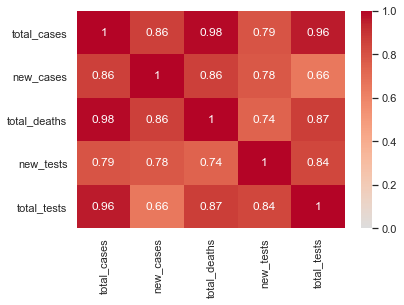

In [15]:
sns.heatmap(data1.corr(), annot=True, vmin=0, vmax=1, center=0, cmap='coolwarm')

In [16]:
#Calculating the variance
data1.var()

total_cases     4.611959e+13
new_cases       1.449596e+09
total_deaths    2.609644e+10
new_tests       2.989421e+10
total_tests     1.004521e+15
dtype: float64

In [17]:
#Standard Deviation
data1.std()

total_cases     6.791140e+06
new_cases       3.807356e+04
total_deaths    1.615439e+05
new_tests       1.728994e+05
total_tests     3.169419e+07
dtype: float64

# Visualization of dataset

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_cases', ylabel='Density'>

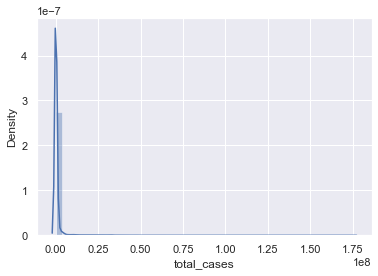

In [18]:
sns.distplot(data1['total_cases'])

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='new_cases', ylabel='Density'>

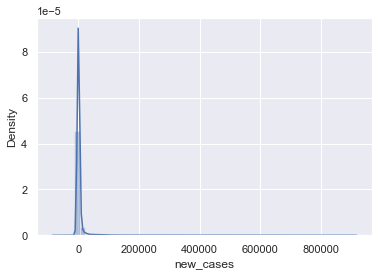

In [19]:
sns.distplot(data1['new_cases'])

Text(0.5, 0, 'MONTH')

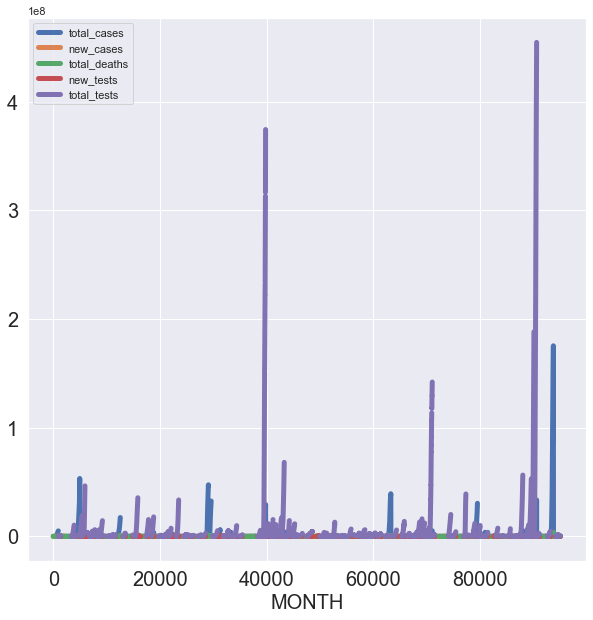

In [20]:
data1.plot(figsize=(10,10),linewidth=5,fontsize=20)
plt.xlabel('MONTH', fontsize=20)


Text(0.5, 0, 'TOTAL CASES')

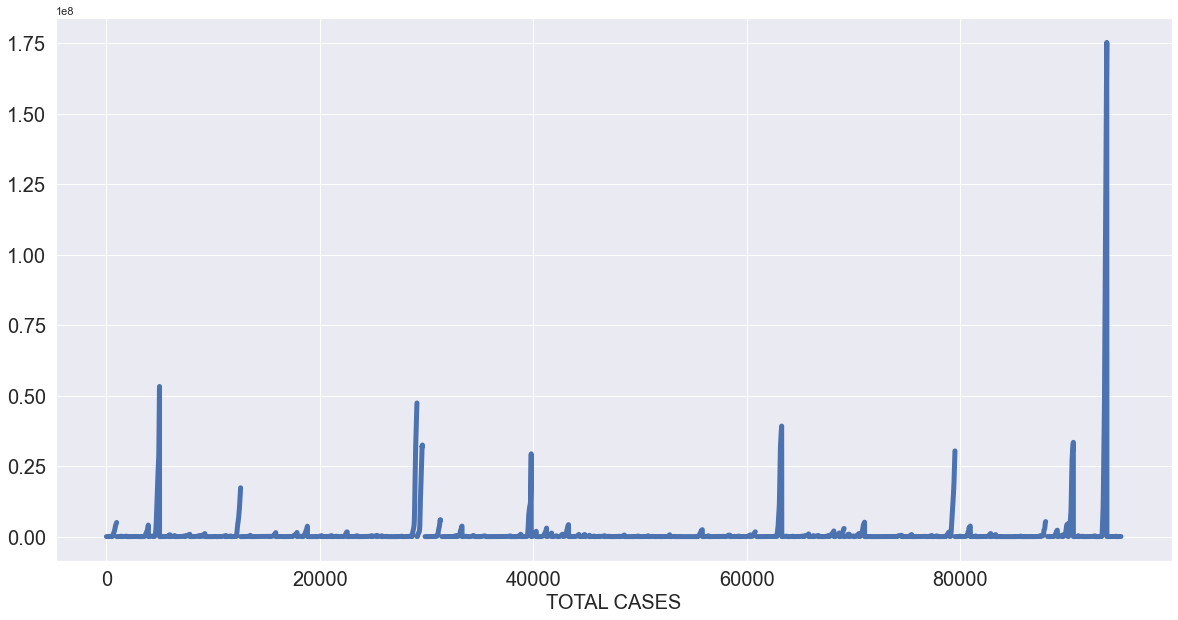

In [21]:
data1.total_cases.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('TOTAL CASES', fontsize=20)

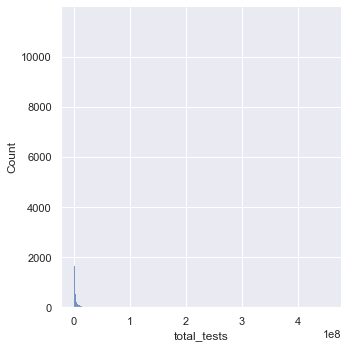

In [22]:
sns.displot(data1['total_tests'])

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='new_tests', ylabel='Density'>

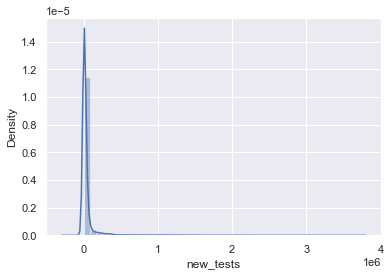

In [23]:
sns.distplot(data1['new_tests'])

Text(0.5, 0, 'MONTH')

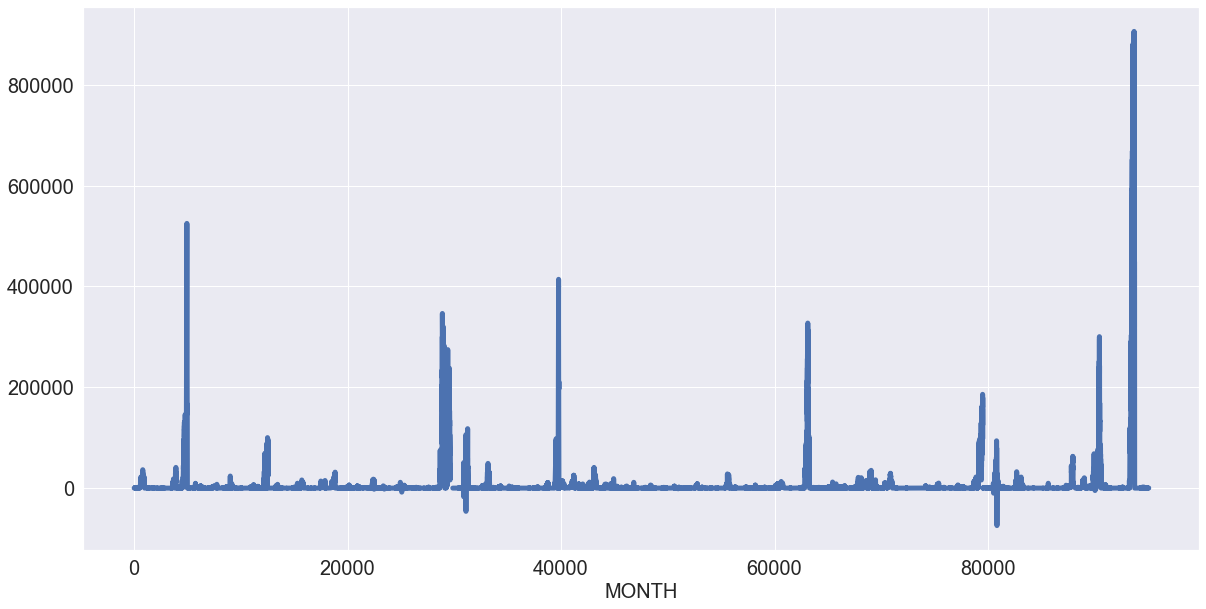

In [24]:
data1.new_cases.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('MONTH', fontsize=20)

Text(0.5, 0, 'MONTH')

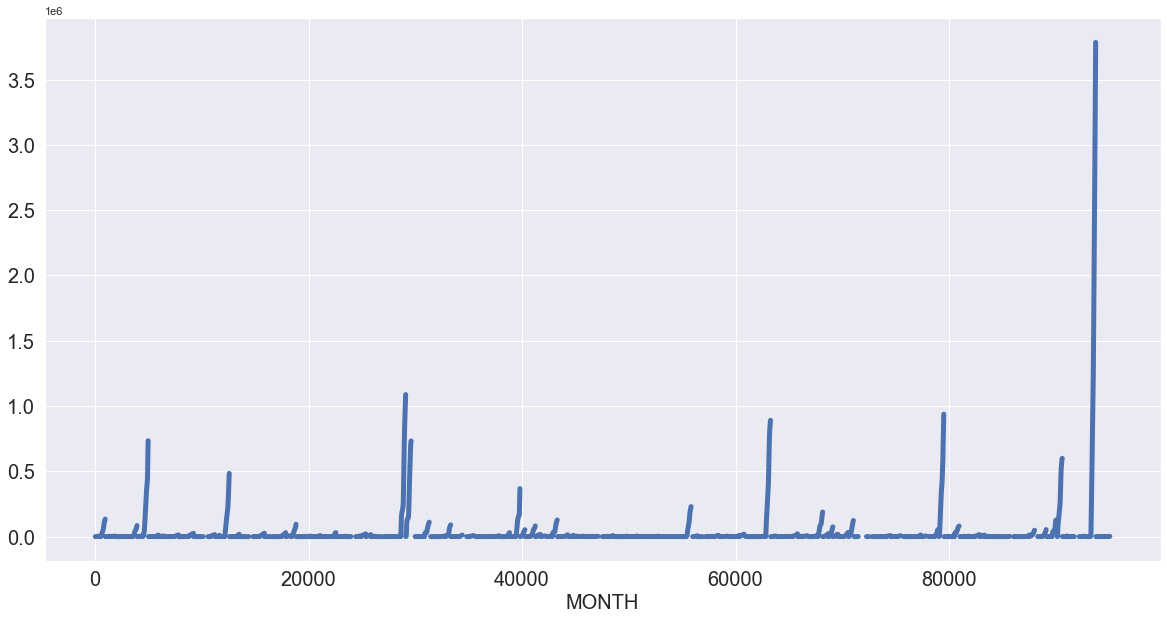

In [25]:
data1.total_deaths.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('MONTH', fontsize=20)

# Trends in Time Series Dataset

Text(0.5, 0, 'MONTH')

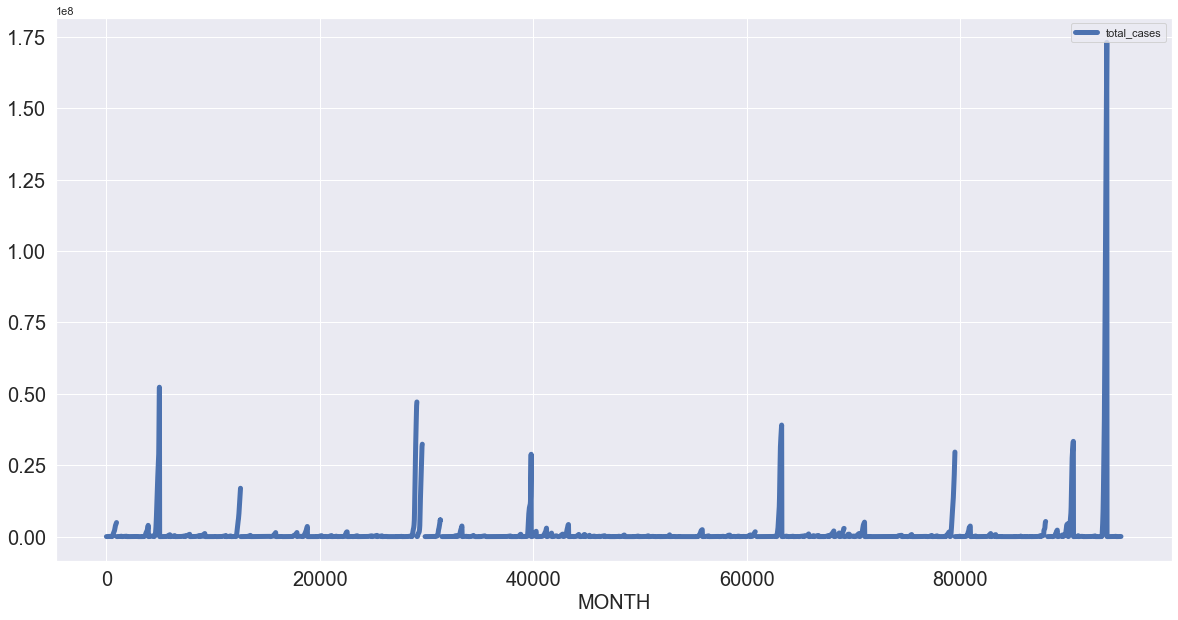

In [26]:
total_cases = data1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('MONTH', fontsize=20)

Text(0.5, 0, 'MONTH')

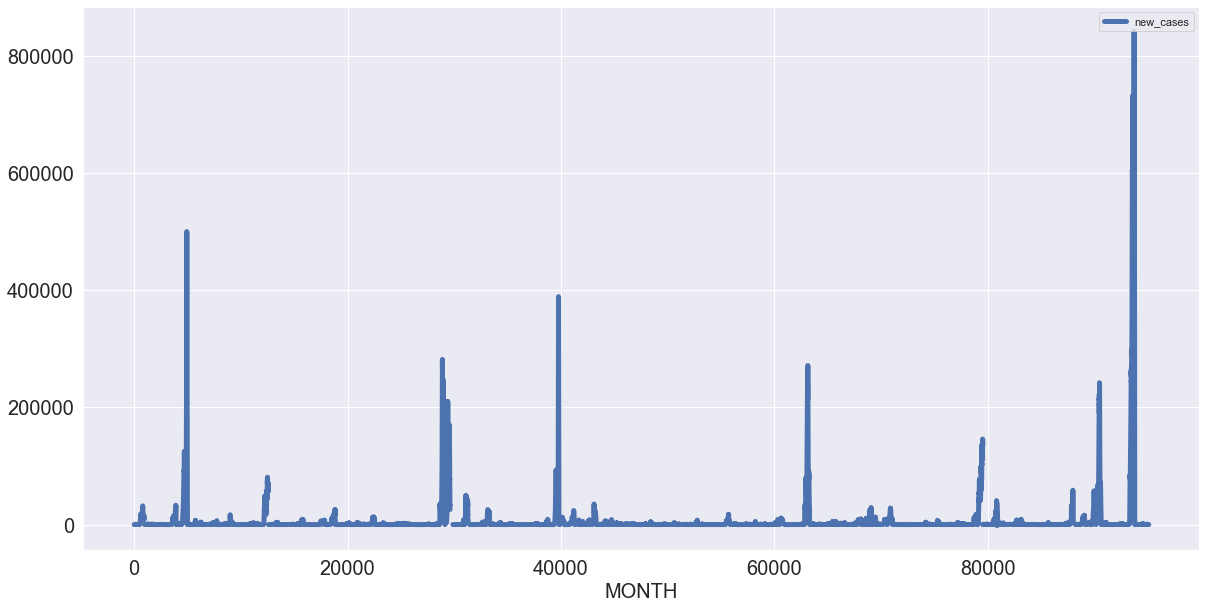

In [27]:
new_cases = data1[['new_cases']]
new_cases.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('MONTH', fontsize=20)

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


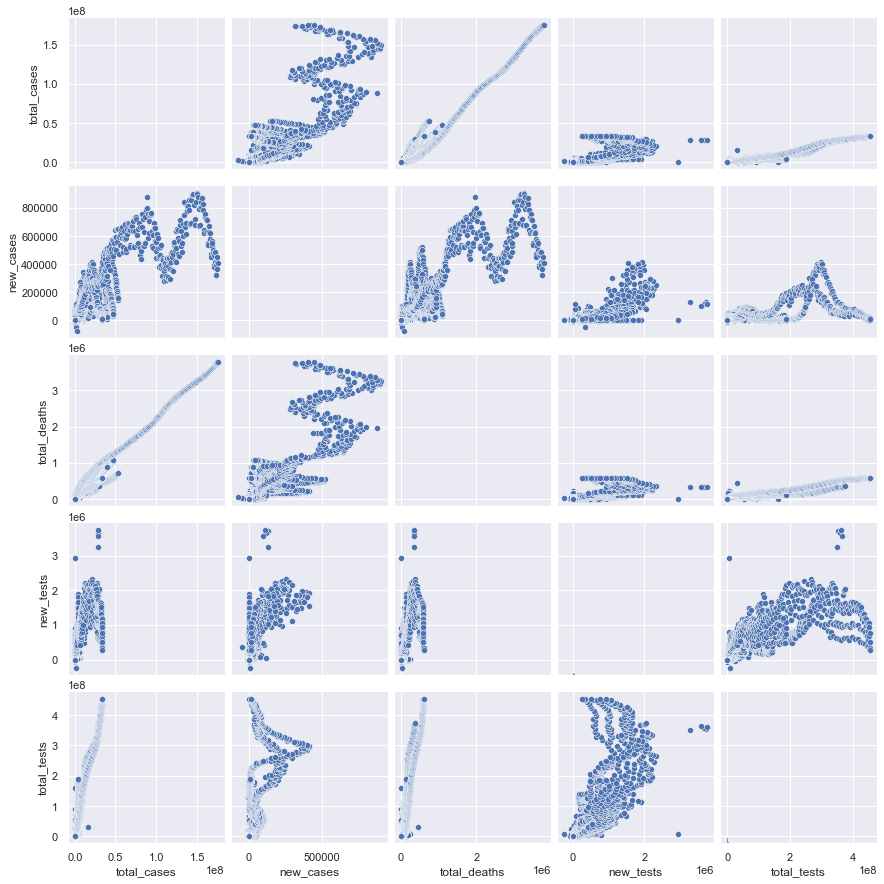

In [29]:
sns.pairplot(data1, size=2.5)

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


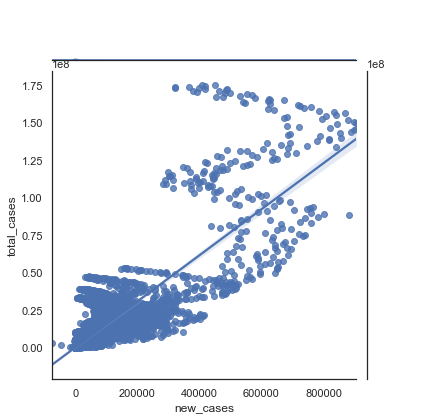

In [30]:
with sns.axes_style('white'):
    sns.jointplot("new_cases","total_cases",data=data1, kind='reg')

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


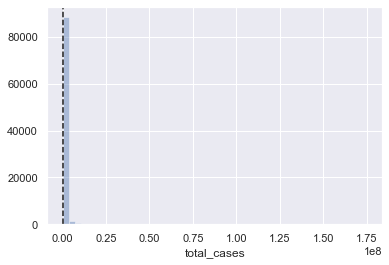

In [31]:
sns.distplot(data1['total_cases'], kde=False)
plt.axvline(0,color="k", linestyle="--")

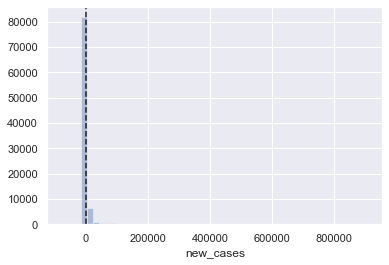

In [32]:
sns.distplot(data1['new_cases'], kde=False)
plt.axvline(0,color="k", linestyle="--")

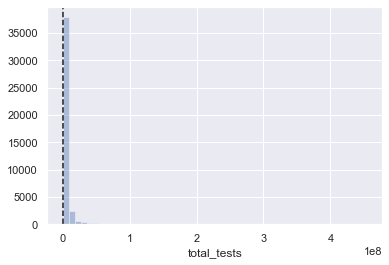

In [33]:
sns.distplot(data1['total_tests'], kde=False)
plt.axvline(0,color="k", linestyle="--")

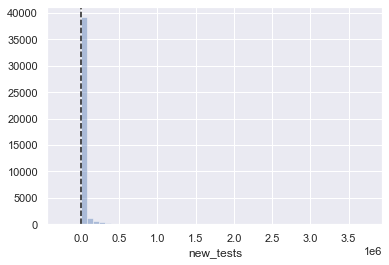

In [34]:
sns.distplot(data1['new_tests'], kde=False)
plt.axvline(0,color="k", linestyle="--")

Text(0.5, 0, 'Month')

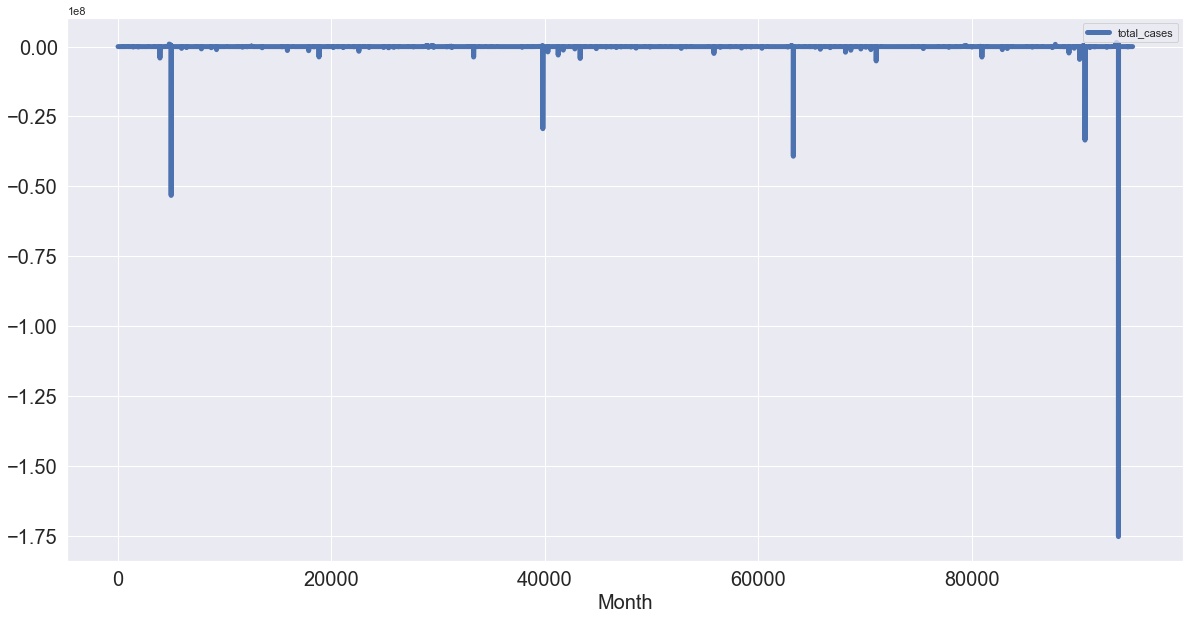

In [38]:
total_cases.diff().plot(figsize = (20,10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

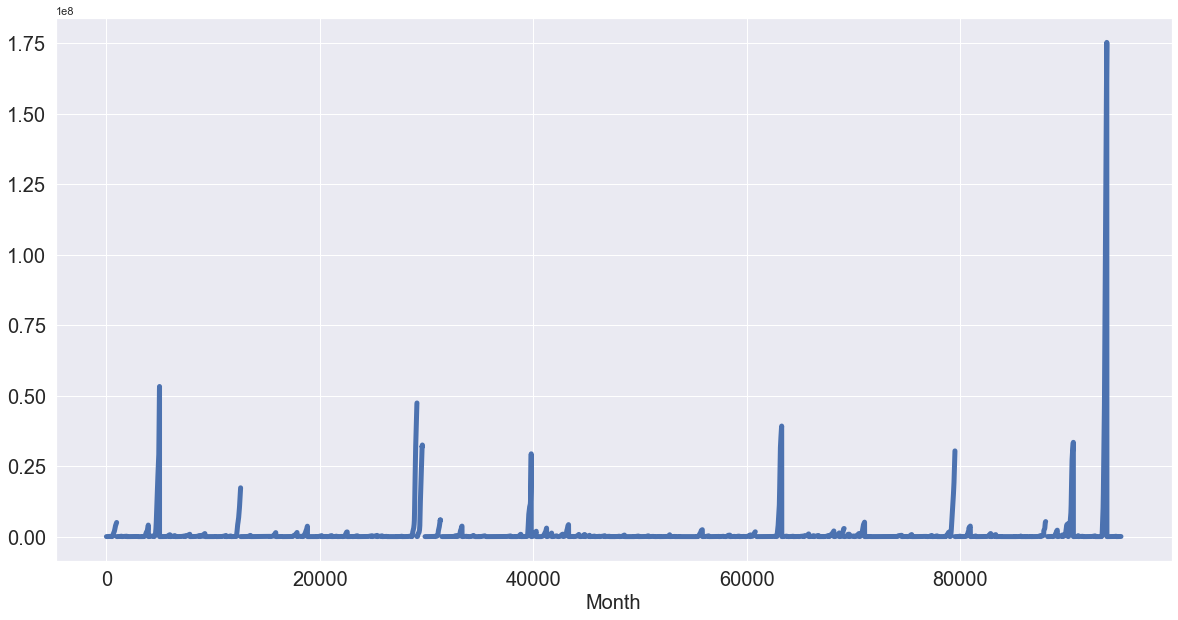

In [39]:
data1.total_cases.plot(figsize = (20,10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'CASES')

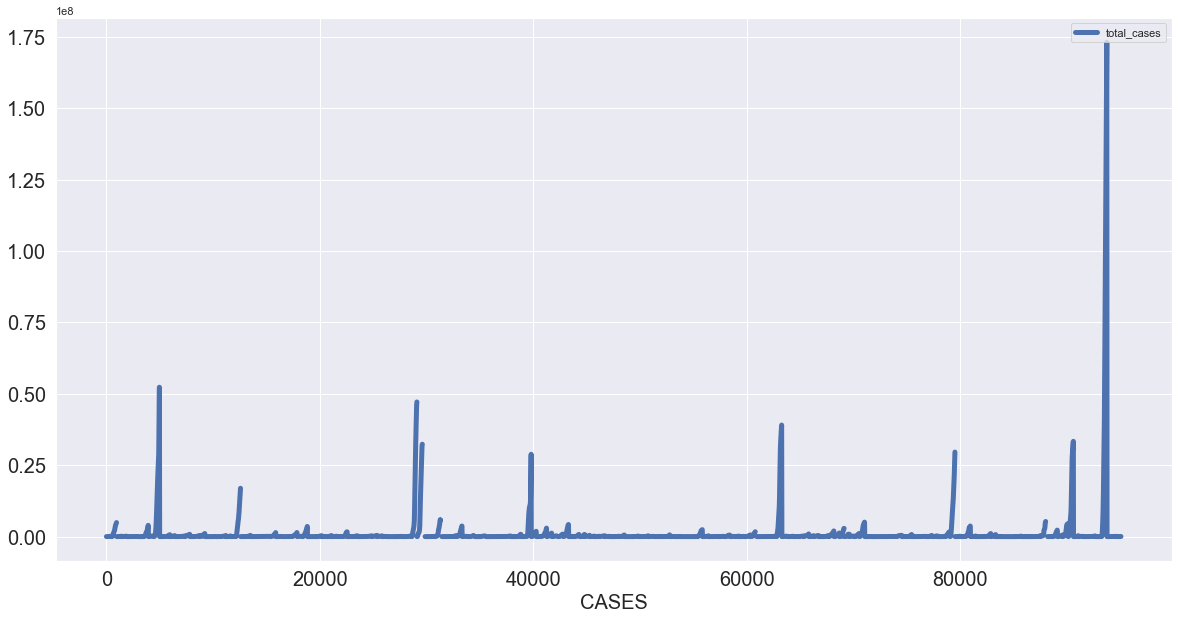

In [40]:
total_cases = data1[["total_cases"]]
total_cases.rolling(12).mean().plot(figsize = (20,10), linewidth =5, fontsize=20)
plt.xlabel("CASES", fontsize=20)